<center>
<h1 style="font-family: 'Times New Roman', Times, serif; font-size: 60px;">DAA</h1>
<h2 style="font-family: 'Times New Roman', Times, serif; font-size: 40px;">Models</h2>
</center>

<font face="Times New Roman">

<h3 style="font-family: 'Times New Roman'">Imports</h3>

In [1]:
# Import necessary libraries
import pandas as pd                                         # Import pandas for data manipulation and analysis
import numpy as np                                          # Import numpy for numerical computations
import matplotlib.pyplot as plt                             # Import matplotlib for data visualization
from sklearn.feature_selection import mutual_info_classif   # Import mutual_info_classif for feature selection based on mutual information
import seaborn as sns                                       # Import seaborn for enhanced data visualization                 

<h3 style="font-family: 'Times New Roman'">Load All Datasets</h3>

In [2]:
final = pd.read_csv("Ficheiros/Ficheiros_Pos_DataAnalysis_After_PP/Final.csv", na_filter=False)
final_teste = pd.read_csv("Ficheiros/Ficheiros_Pos_DataAnalysis_After_PP/Final_Teste.csv")

<h3 style="font-family: 'Times New Roman'">Remove Features</h3>

In [3]:
final = final.drop(['date', 'Data', 'hour_str'], axis=1)
final_teste = final_teste.drop(['date', 'Data', 'hour_str'], axis=1)

# Assuming 'injection' is the target variable
target_variable = 'injection'

correlation_threshold = 0.24
mutual_information = 0.1

# Calculate correlation matrices
correlation_matrix = final.corr()

# Calculate mutual information
mutual_info = mutual_info_classif(final, final[target_variable], discrete_features='auto', random_state=2024)

columns_to_drop = []

# Filter columns based on correlation with the target variable using Pearson, Spearman, and Mutual Information
for column in final.columns:
    corr = abs(correlation_matrix[target_variable][column])
    mutual_info_value = mutual_info[final.columns.get_loc(column)]

    if corr <= correlation_threshold and mutual_info_value <= mutual_information:
        columns_to_drop.append(column)

# Drop the selected columns from both DataFrames
final = final.drop(columns=columns_to_drop)
final_teste = final_teste.drop(columns=columns_to_drop)

print(columns_to_drop)

['rain_1h', 'clouds_all', 'weather_description', 'dew_point', 'day', 'month', 'year', 'day_of_week', 'isFeriado', 'is_weekend', 'Estacao_do_Ano', 'vacaciones', 'consumo_total']


In [4]:
final = final.drop(['temp_min', 'temp', 'feels_like'], axis=1)
final_teste = final_teste.drop(['temp_min', 'temp', 'feels_like'], axis=1)

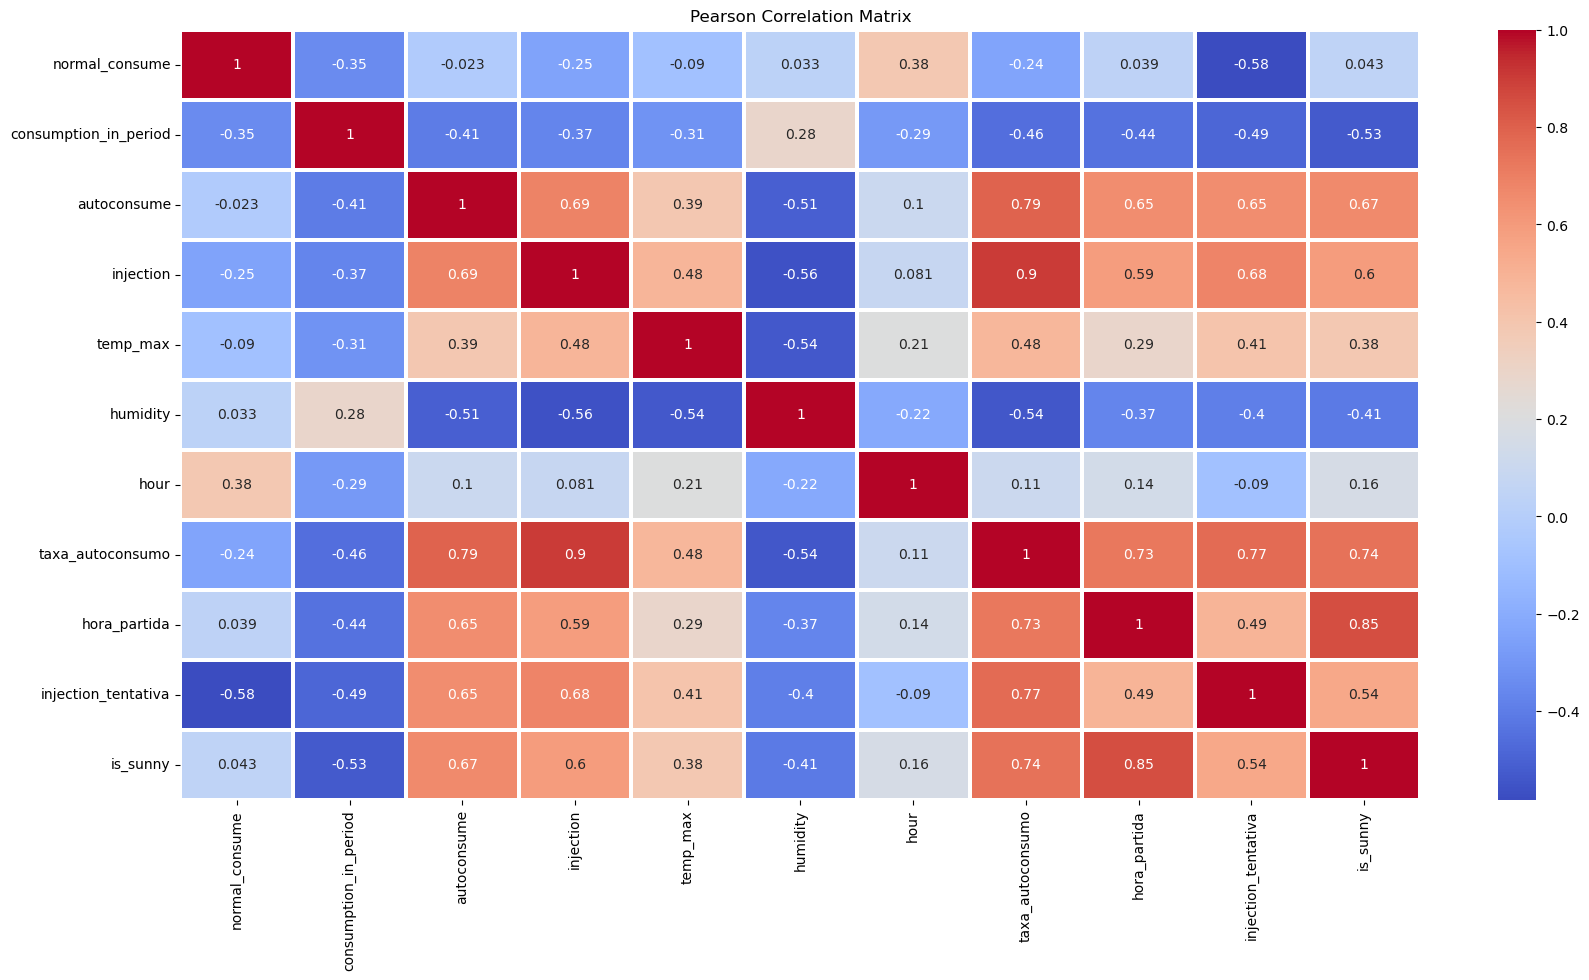

In [6]:
correlation_matrix = final.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=1.5)
plt.title("Pearson Correlation Matrix")
plt.show()

<h3 style="font-family: 'Times New Roman'">Model Comparison</h3>

Model: XGBoost
CV Accuracy: 0.87625 +- 0.00775
Model: RandomForest
CV Accuracy: 0.87973 +- 0.00614
Model: GradientBoosting
CV Accuracy: 0.88167 +- 0.00611
Model: ExtraTrees
CV Accuracy: 0.87749 +- 0.00640
Model: NaiveBayes
CV Accuracy: 0.69315 +- 0.01134
Model: KNN
CV Accuracy: 0.79541 +- 0.00892
Model: DecisionTreeClassifier
CV Accuracy: 0.84568 +- 0.00749
Model: MLP
CV Accuracy: 0.85603 +- 0.00814
Model: SVC
CV Accuracy: 0.73787 +- 0.00396
Model: Ridge
CV Accuracy: 0.81349 +- 0.00612
Model: SGD
CV Accuracy: 0.77201 +- 0.03849


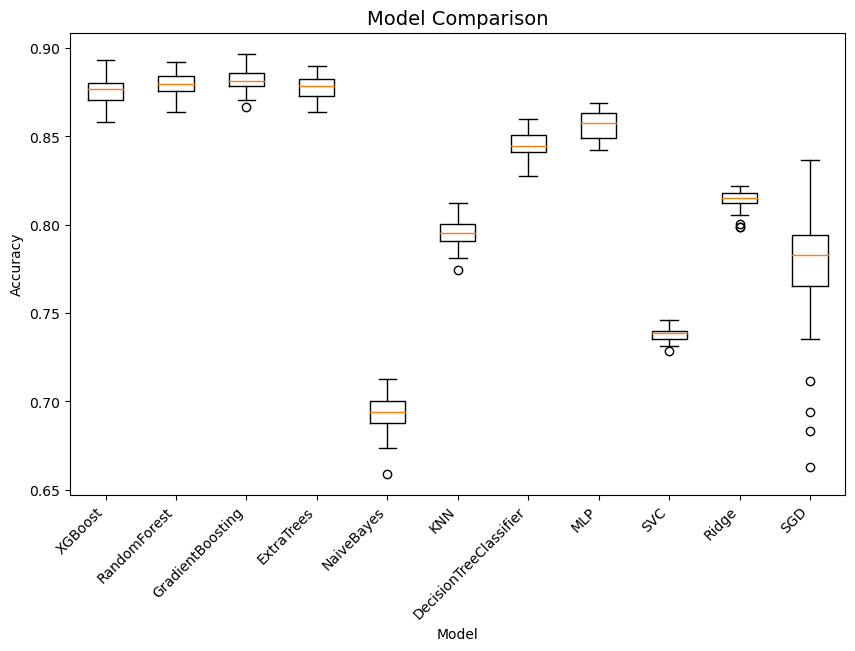

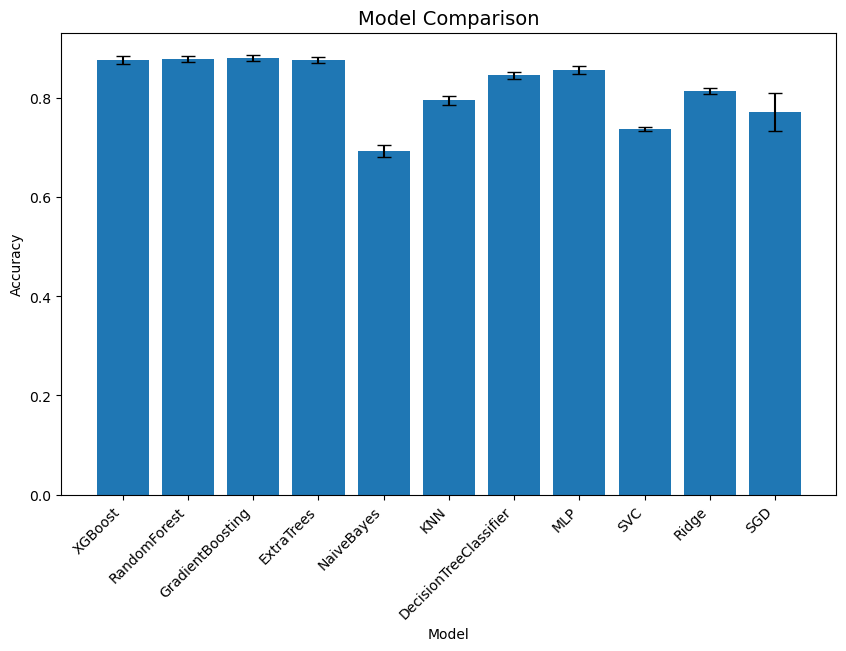

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier, ExtraTreesClassifier, VotingClassifier, HistGradientBoostingClassifier, StackingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import RidgeClassifier, SGDClassifier
from xgboost import XGBClassifier, XGBRegressor

# Assuming `final` is your dataset
X = final.drop(columns=['injection'])
y = final['injection']


# Add the new models to your dictionary
models_to_test = {
    'XGBoost': XGBClassifier(),
    'RandomForest': RandomForestClassifier(),
    'GradientBoosting': GradientBoostingClassifier(),
    'ExtraTrees': ExtraTreesClassifier(),
    'NaiveBayes': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'MLP': MLPClassifier(),
    'SVC': SVC(),
    'Ridge': RidgeClassifier(),
    'SGD': SGDClassifier(),
}

def model_comparison(models, x, y):
    results = []
    names = []

    for name, model in models.items():
        rskf = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=2022)
        accuracies = cross_val_score(model, x, y, scoring='accuracy', cv=rskf, n_jobs=-1)
        results.append(accuracies)
        names.append(name)
        print(f'Model: {name}')
        print(f'CV Accuracy: {np.mean(accuracies):.5f} +- {np.std(accuracies):.5f}')

    return results, names

# Assuming x_train and y_train are your training data and labels
results, names = model_comparison(models_to_test, X, y)

plt.figure(figsize=(10, 6))
comparison = plt.boxplot(results)
plt.xticks(np.arange(1, len(names) + 1), names, rotation=45, ha='right')
plt.title('Model Comparison', size=14)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show(comparison)

plt.figure(figsize=(10, 6))
plt.bar(names, [np.mean(acc) for acc in results], yerr=[np.std(acc) for acc in results], capsize=5)
plt.title('Model Comparison', size=14)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')
plt.show()

<h3 style="font-family: 'Times New Roman'">Save DataSet</h3>

In [9]:
final.to_csv("Ficheiros/Ficheiros_Models/Final.csv", index=False)
final_teste.to_csv("Ficheiros/Ficheiros_Models/Final_Teste.csv", index=False)